In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [3]:
pd.set_option('display.max_rows', None)

In [4]:
pd.set_option('display.max_colwidth', None)

In [55]:
renda1_91 = pd.read_csv('\\Users\luisr\Desktop\Repository\IBM_courses\Course Work\Assignments\Final Capstone Project\\rio dataframes\\Outside Data\\raw\\bairros\\census\\renda_1_1991.csv')

renda1_00 = pd.read_csv('\\Users\luisr\Desktop\Repository\IBM_courses\Course Work\Assignments\Final Capstone Project\\rio dataframes\\Outside Data\\raw\\bairros\\census\\renda_1_2000.csv', index_col=0)

renda2_91 = pd.read_csv('\\Users\luisr\Desktop\Repository\IBM_courses\Course Work\Assignments\Final Capstone Project\\rio dataframes\\Outside Data\\raw\\bairros\\census\\renda_2_1991.csv')

renda2_00 = pd.read_csv('\\Users\luisr\Desktop\Repository\IBM_courses\Course Work\Assignments\Final Capstone Project\\rio dataframes\\Outside Data\\raw\\bairros\\census\\renda_2_2000.csv')

renda2_10 = pd.read_csv('\\Users\luisr\Desktop\Repository\IBM_courses\Course Work\Assignments\Final Capstone Project\\rio dataframes\\Outside Data\\raw\\bairros\\census\\renda_2_2010.csv')

renda3_91 = pd.read_csv('\\Users\luisr\Desktop\Repository\IBM_courses\Course Work\Assignments\Final Capstone Project\\rio dataframes\\Outside Data\\raw\\bairros\\census\\renda_3_1991.csv')

renda3_00 = pd.read_csv('\\Users\luisr\Desktop\Repository\IBM_courses\Course Work\Assignments\Final Capstone Project\\rio dataframes\\Outside Data\\raw\\bairros\\census\\renda_3_2000.csv', index_col=0)

In [161]:
len(renda1_91), len(renda1_00), len(renda2_91), len(renda2_00), len(renda2_10), len(renda3_91), len(renda3_00)

(125, 125, 125, 125, 111, 125, 125)

In [72]:
renda1 = pd.merge(renda1_91, renda1_00, on='Bairros')

In [73]:
renda2 = pd.merge(renda2_91, renda2_00, on='Bairros')

In [74]:
renda3 = pd.merge(renda3_91, renda3_00, on='Bairros')

In [76]:
renda91_00 = pd.merge(pd.merge(renda1, renda2, on='Bairros'), renda3, on='Bairros')

In [132]:
len(renda1), len(renda2), len(renda3), len(renda91_00), 

(125, 125, 125, 125)

In [116]:
a, b = renda1_91, renda1_00
c, d, e = renda2_91, renda2_00, renda2_10
f, j = renda3_91, renda3_00

In [117]:
ano_1991 = [a, c, f]
ano_2000 = [b, d, j]

for i in range(3):
    
    ano_1991[i]['Ano'] = [1991 for i in range(len(ano_1991[i]))]
    ano_2000[i]['Ano'] = [2000 for i in range(len(ano_2000[i]))]

e['Ano'] = [2010 for i in range(len(e))]

In [124]:
renda1_c = pd.concat([a, b], axis=0)

In [148]:
renda2_c = pd.concat([c, d], axis=0)

In [126]:
renda3_c = pd.concat([f, j], axis=0)

In [149]:
rendas2_c = pd.merge(pd.merge(renda1_c, renda2_c, on=['Bairros', 'Ano']), renda3_c, on=['Bairros', 'Ano'])

In [146]:
len(rendas_c), len(renda1_c), len(renda2_c), len(renda3_c), len(a), len(b), len(c), len(d), len(e), len(f), len(j)

(250, 250, 361, 250, 125, 125, 125, 125, 111, 125, 125)

# Saving

## Additional formatting and Type Conversion: Horizontal Table

In [84]:
for col in renda91_00.columns[1:]:
    
    
    renda91_00[col] = [i.replace(' ', '').replace(',', '.') for i in renda91_00[col]]
    

In [86]:
renda91_00.iloc[:, 1:] = renda91_00.iloc[:, 1:].astype(float)

In [87]:
#renda91_00.to_csv('\\Users\luisr\Desktop\Repository\IBM_courses\Course Work\Assignments\Final Capstone Project\\rio dataframes\\Outside Data\\raw\\bairros\\census\\renda_91_00.csv', index=False)

## Additional formatting and Type Conversion: Vertical Table

In [155]:
for col in rendas_c.columns[1:]:
    
    
    rendas_c[col] = [i.replace(' ', '').replace(',', '.') for i in rendas_c[col].astype(str)]
    

In [156]:
rendas_c.iloc[:, 1:] = rendas_c.iloc[:, 1:].astype(float)

In [157]:
#rendas_c.to_csv('\\Users\luisr\Desktop\Repository\IBM_courses\Course Work\Assignments\Final Capstone Project\\rio dataframes\\Outside Data\\raw\\bairros\\census\\rendas_vert.csv', index=False)

# Correlation Heatmap

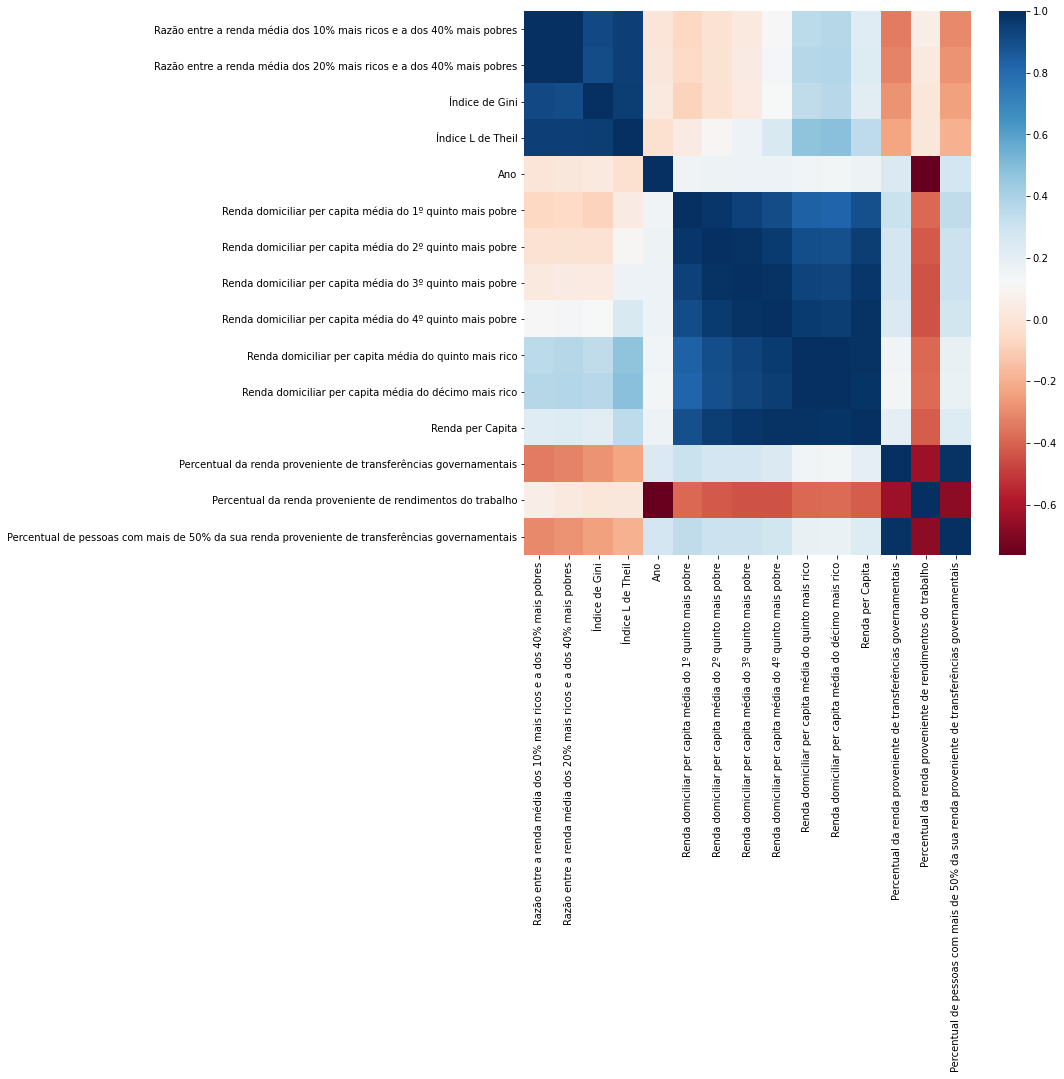

In [162]:
fig = plt.figure(figsize=(10, 10))
ax0 = fig.add_subplot(111)
sns.heatmap(data=rendas_c.iloc[:, 1:].astype(float).corr(), ax=ax0, cmap='RdBu')